### LEAD SCORING CASE STUDY
GOAL : To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

In [61]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
#Visualisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [95]:
#Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [96]:
#Importing Dataset
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Dataframe

In [97]:
#Dimensions of dataframe
df.shape

(9240, 37)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##There are many columns with missing/null values

In [67]:
#checking duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0


True

#No duplicate values

In [68]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [69]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Data cleaning

In [105]:
# There are SELECT values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [106]:
## Sum of Null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1942
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [107]:
#Percentage of missing values, rounded off to two decimal
round((df.isnull().sum()/len(df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   21.02
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [108]:
# Dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [109]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [110]:
# dropping columns with more than 45% missing values
cols= df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)
    

In [111]:
## Rechecking percentage of null values
round((df.isnull().sum()/len(df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   21.02
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Attribute Analysis

In [112]:
#Checking value_counts of Country column
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Canada                     4
Kuwait                     4
South Africa               4
Sweden                     3
Ghana                      2
Asia/Pacific Region        2
Belgium                    2
China                      2
Philippines                2
Italy                      2
Bangladesh                 2
Uganda                     2
Netherlands                2
Russia                     1
Sri Lanka                  1
Indonesia                  1
Liberia                    1
Kenya                      1
Denmark       

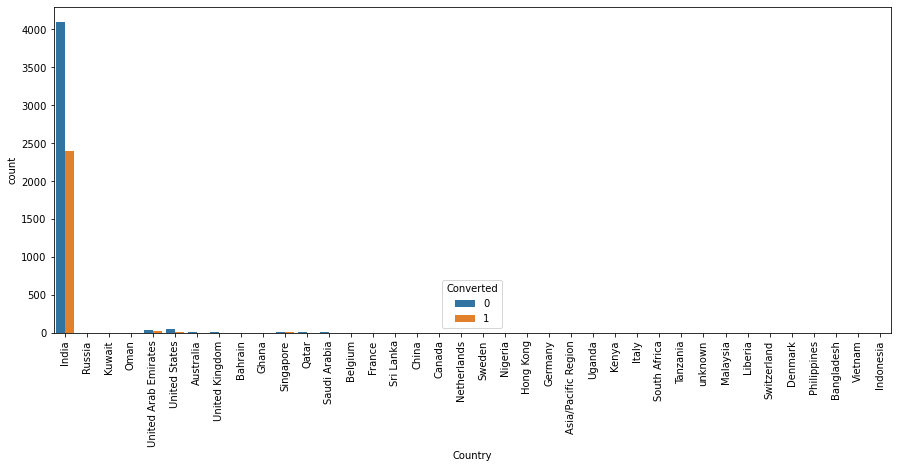

In [113]:
#plotting spread of Country column
plt.figure(figsize=(15,6))
s1=sns.countplot(df.Country,hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [114]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
df['Country']= df['Country'].replace(np.nan,'India')

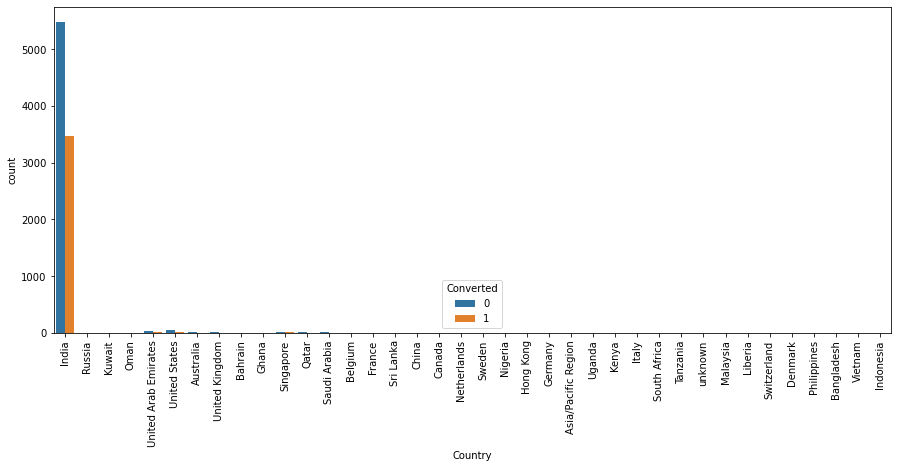

In [115]:
#Plotting the spread of Country column after replacement of Nan values
plt.figure(figsize=(15,6))
s1=sns.countplot(df.Country,hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##Since the Number of Values for India are quite high (more than 95% of the Data), this column can be dropped

In [116]:
# Creating a bucket list of columns to be dropped
col_2_drop=['Country']

In [117]:
#Checking value_counts of City column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [118]:
#Since Mumbai is the most common City hence replacing the NaN values with Mumbai
df['City']= df['City'].replace (np.nan,'Mumbai')

<function matplotlib.pyplot.show(*args, **kw)>

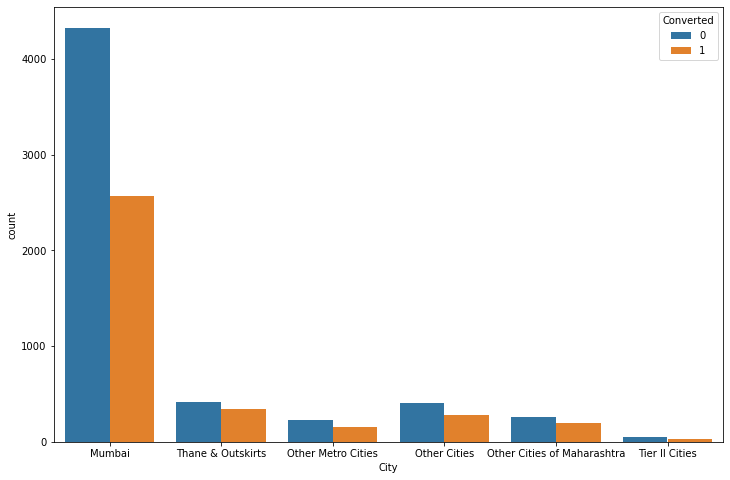

In [120]:
#plotting spread of City Columns
plt.figure(figsize= (12,8))
sns.countplot(df.City,hue=df.Converted)
plt.show
           

In [119]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

NaN                                  1942
Not Specified                        1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [121]:
# Null values in this means either it was not in the list or maybe they are  students don't have a specialization yet
# Replacing NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

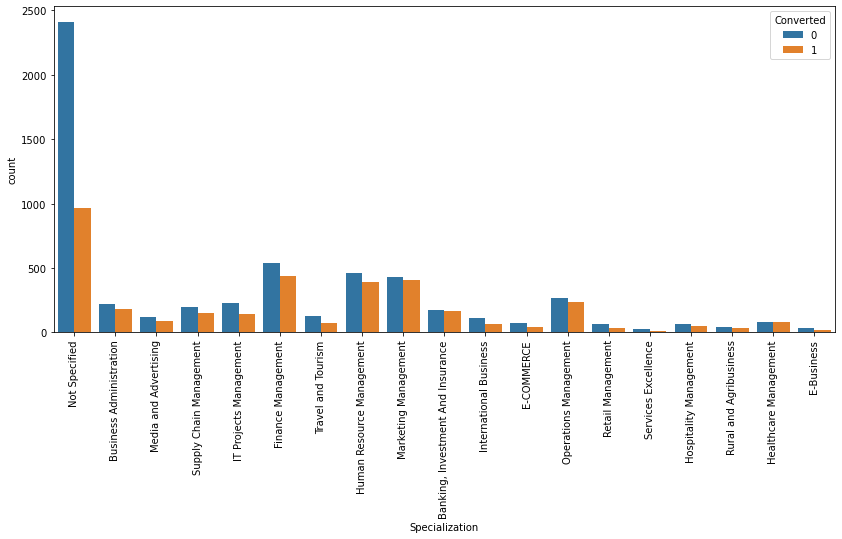

In [122]:
#Plotting spread of Specialization columnn 

plt.figure(figsize=(14,6))
S1=sns.countplot(df.Specialization, hue=df.Converted)
S1.set_xticklabels(S1.get_xticklabels(),rotation=90)
plt.show()

###Insight: Specializations with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped. Rather they should be combined as one Management_Specialization.

In [129]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specialization')  

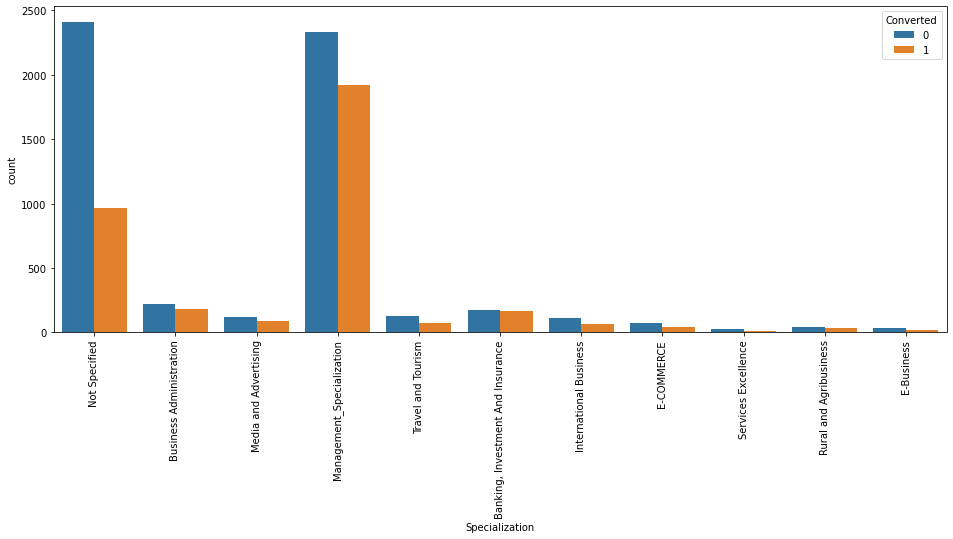

In [131]:
# Visualizing the count of Specilisation Variable based on Converted value

plt.figure(figsize=(16,6))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [134]:
#Checking Value_counts of 'What is your current occupation'

df['What is your current occupation'].value_counts(dropna=False)



Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [136]:
#Imputing Nan values in 'What is your current occupation' with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [137]:
#Rechecking count of values 'What is your current occupation'
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

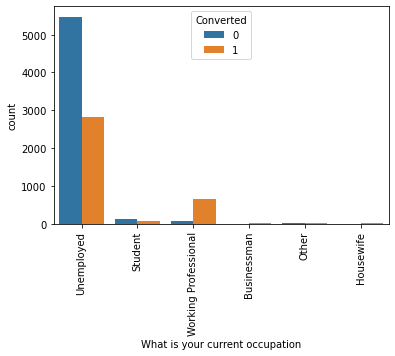

In [138]:
#Visualizing count of Variable based on Converted value

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## Insights:
###1) Working Professionals have high chances of getting into CONVERTED.
###2) Unemployed leads are the most in terms of Absolute numbers.

In [139]:
# Checking value counts 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [141]:
# Replacing Nan values in 'What matters most to you in choosing a course' with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

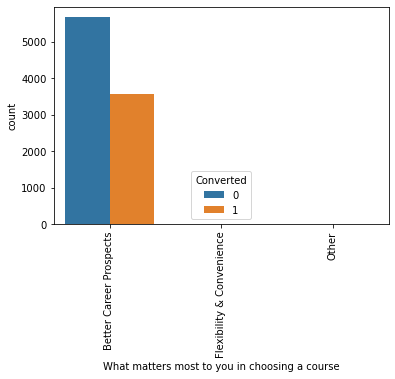

In [142]:
#Visualizing count of Variable 'What matters most to you in choosing a course' based on Converted value

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [143]:
# Rechecking value counts of variable 'What matters most to you in choosing a course'after Imputation
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Insight:
Since the value' Better Career Prospects' is more than 98% of values in this column'What matters most to you in choosing a course' , hence this column can be dropped.

In [144]:
##  Appending to the cols_to_drop List
col_2_drop.append('What matters most to you in choosing a course')
col_2_drop

['Country', 'What matters most to you in choosing a course']

In [145]:
# Checking value counts of 'Tags' variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [146]:
# Replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

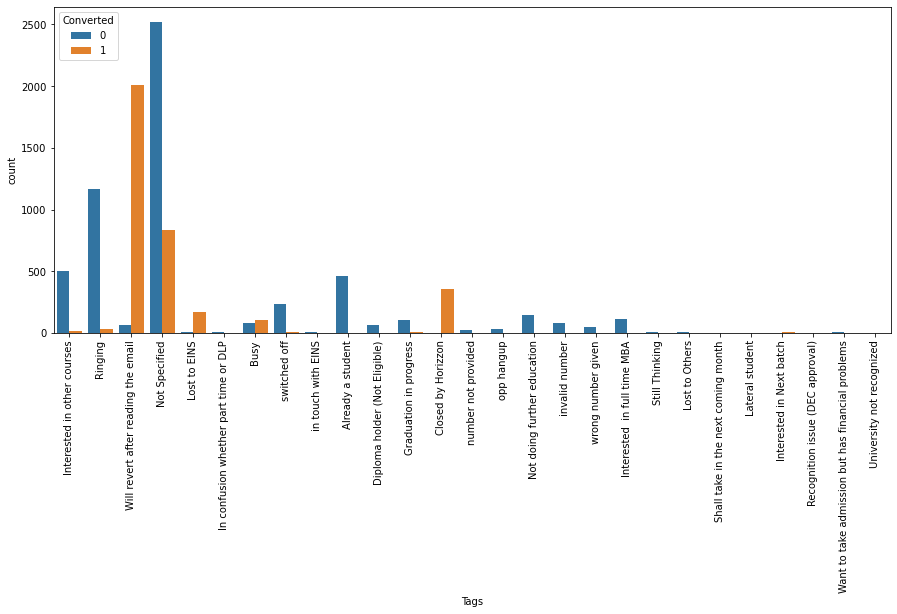

In [148]:
# Visualizing count of Variable 'Tags' based on Converted value

plt.figure(figsize=(15,6))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Insights: There are many 'Tags ' with low frequency hence the can be clubbed into one 'Other _Tags'

In [149]:
# Replacing tags with low frequency with "Other_Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



In [150]:
#Rechecking value count of variable 'Tags'
df['Tags'].value_counts(dropna= False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [152]:
# Rechecking percentage of missing values in the Data set
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [153]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
WeLearn                 1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [156]:
#replacing Nan Values and combining low frequency values for 'Lead Source'into Common Values(Google,Social Media) and 'Others'
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')         

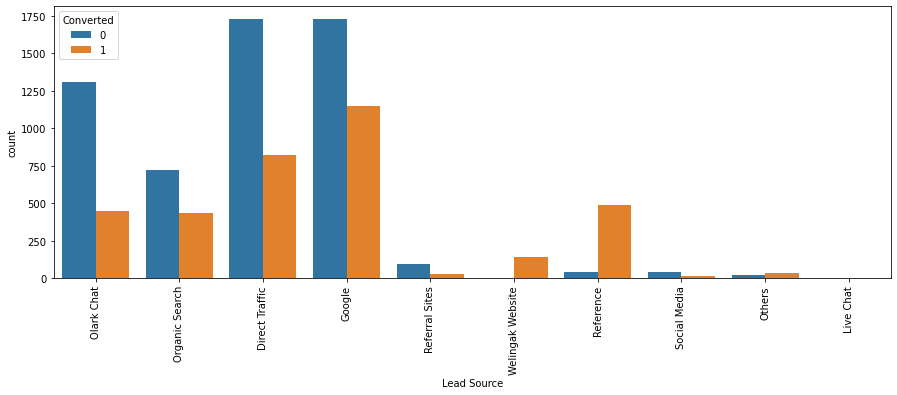

In [157]:
# Visualizing count of Variable 'Lead Source' based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

####Insight:
#1)Maximum number of leads are generated by Google and Direct traffic.
#2)Conversion Rate of reference leads and leads through welingak website is high.
#3)To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [158]:
# checking value counts of 'Last Activity':

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [159]:
#replacing Nan Values and combining low frequency values in 'Last Activity 'into 'Others'

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [160]:
# Rechecking value counts of 'Last Activity':

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [161]:
#Re-Checking the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [162]:
#Dropping all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [163]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [164]:
# Checking Value Counts of 'Lead Origin'
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

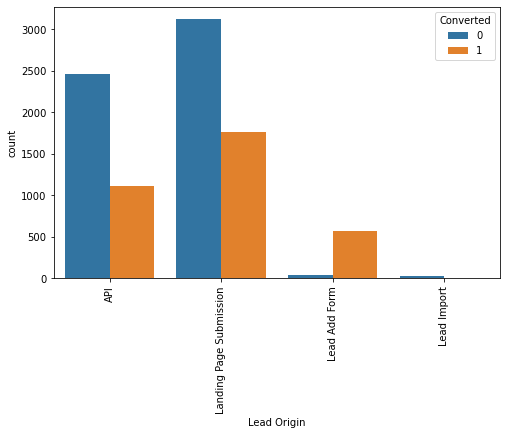

In [165]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
S1=sns.countplot(df['Lead Origin'], hue=df.Converted)
S1.set_xticklabels(S1.get_xticklabels(),rotation=90)
plt.show()

### Insight 
#API and Landing Page Submission bring higher number of leads as well as conversion.
#Lead Add Form has a very high conversion rate but count of leads are not very high.
#Lead Import and Quick Add Form provide very less number of leads.
#In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page. 
#Submission origin and generate more leads from Lead Add Form.

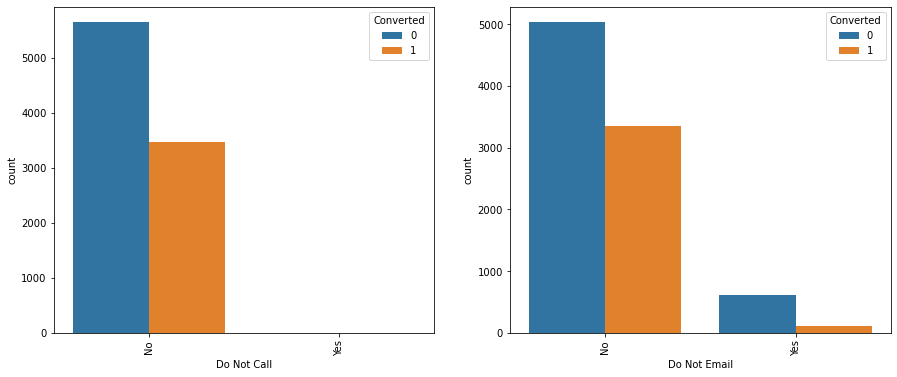

In [166]:
# Visualizing count of Variable 'Do Not Email' & 'Do Not Call'based on Converted value

plt.figure(figsize=(15,6))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [167]:
# Checking value counts of variable  'Do Not Email'
df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [168]:
# Checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

###Insight :We Can append the 'Do Not Call' Column to the list of Columns to be Dropped since > 90% is of only one Value

In [169]:
col_2_drop.append('Do Not Call')
col_2_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

### Identifying skewed categorical columns that can be dropped

In [177]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

###Insight :We Can append the 'Search' Column to the list of Columns to be Dropped since > 90% is of only one Value

In [178]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

###Insight :We Can append the 'Magazine' Column to the list of Columns to be Dropped 100% is of only one Value

In [179]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

###Insight :We Can append the 'Newspaper Article' Column to the list of Columns to be Dropped since > 99% is of only one Value

In [180]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

###Insight :We Can append the 'X Education Forums' Column to the list of Columns to be Dropped since > 99% is of only one Value

In [181]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

###Insight :We Can append the 'Newspaper' Column to the list of Columns to be Dropped since > 90% is of only one Value

In [182]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

###Insight :We Can append the 'Digital Advertisement ' Column to the list of Columns to be Dropped since > 90% is of only one Value

In [183]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

###Insight :We Can append the 'Through Recommendations ' Column to the list of Columns to be Dropped since > 90% is of only one Value

In [189]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

###Insight :We Can append the 'Receive More Updates About Our Courses ' Column to the list of Columns to be Dropped since > 90% is of only one Value

In [190]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

###Insight :We Can append the 'Update me on Supply Chain Content ' Column to the list of Columns to be Dropped since > 99% is of only one Value

In [192]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

###Insight :We Can append the 'Get updates on DM Content ' Column to the list of Columns to be Dropped since > 99% is of only one Value

In [193]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

###Insight :We Can append the 'I agree to pay the amount through cheque ' Column to the list of Columns to be Dropped since > 99% is of only one Value

In [194]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [195]:
#adding skewed categorical columns to the list of columns to be dropped

col_2_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [196]:
col_2_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [197]:
#checking value counts of 'Last Notable Activity'
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [198]:
#Clubbing and replacing lower frequency values of 'Last Notable Activity'into 'Other_Notable_activity'

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [199]:
#Checking value counts for variable 'Last Notable Activity'

df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

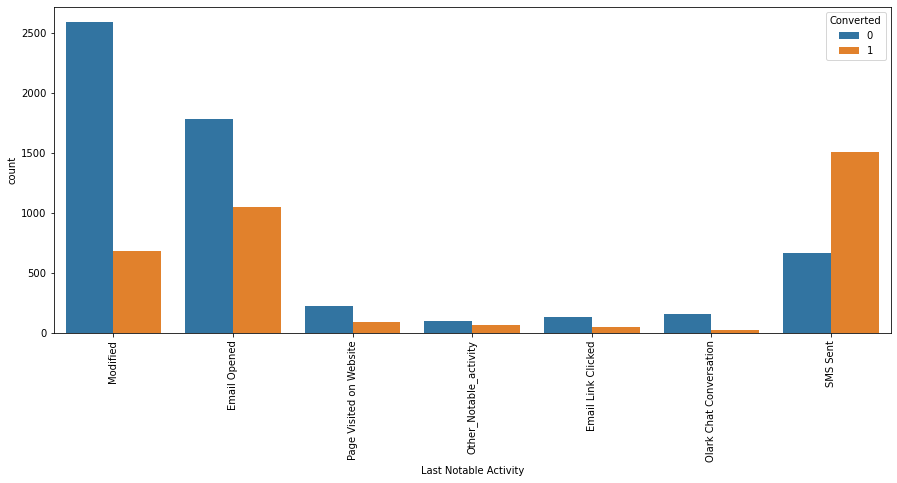

In [200]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize = (15,6))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [201]:
# Dropping the columns
df = df.drop(col_2_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Numerical Attributes Analysis

In [202]:
#Checking the % of Leads that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

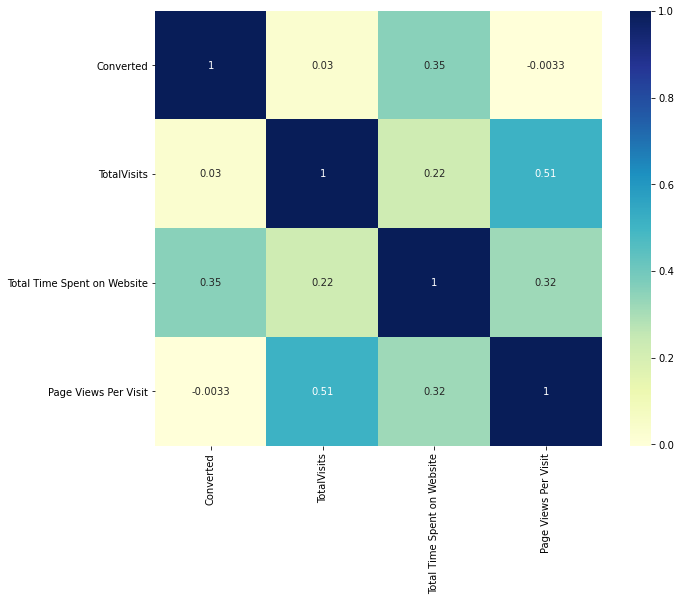

In [203]:
#Plotting heatmap to check correlations of numeric values

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

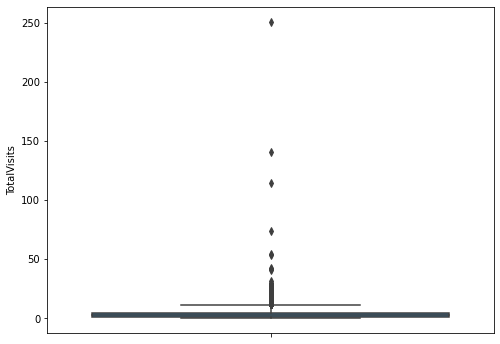

In [204]:
# Visualizing spread of variable 'Total Visits'

plt.figure(figsize=(8,6))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [206]:
# Checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Insight: Presence of Outliers 

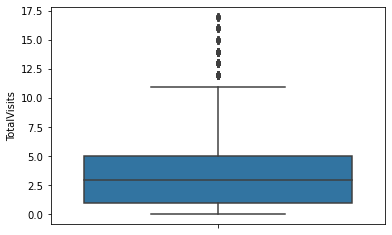

In [207]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [208]:
#checking percentiles for numeric variable "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

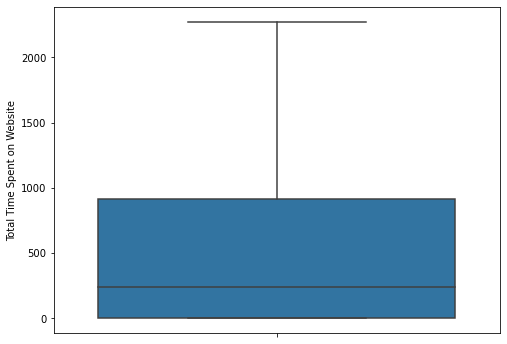

In [210]:
#visualizing spread of numeric variable 'Total Time Spent on Website'

plt.figure(figsize=(8,6))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

###Insight : No outliers

In [211]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

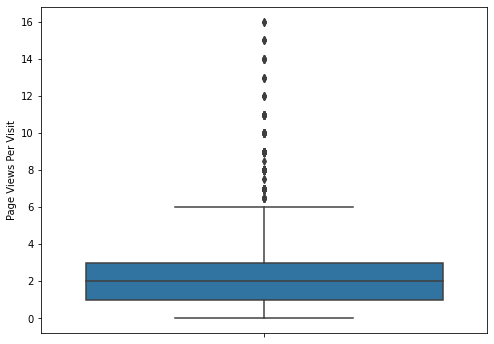

In [213]:
# Visualizing spread of numeric variable "Page Views Per Visit"

plt.figure(figsize=(8,6))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

### Insight :Presence of Outliers which needs treatment 

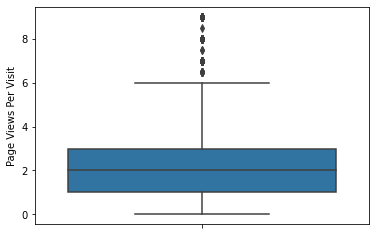

In [214]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()


In [216]:
df.shape

(8953, 14)

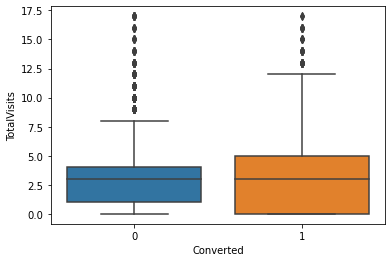

In [217]:
#Checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()


### Inference

Median values for converted and not converted leads are very close.
Nothing conclusive can be said on the basis of Total Visits.

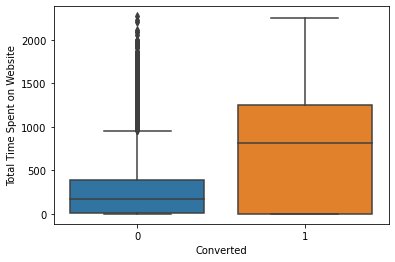

In [218]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

### Insight

#1Leads spending more time on the website are more likely to be converted.
#2 Hence Website should be made more engaging to make leads spend more time.

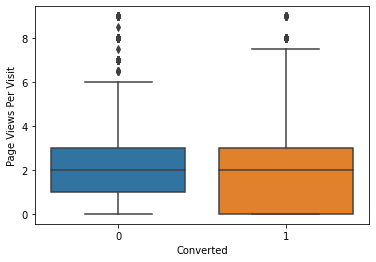

In [219]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Insight:

Median for converted and unconverted leads are almost  same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

In [220]:
# Checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#No missing values in the columns to be analysed further 

### Dummy Variable Creation:

In [221]:
# Obtaining  a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Converting some binary variables (Yes/No) to 0/1¶

In [224]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the Leads list
df[varlist] = df[varlist].apply(binary_map)

In [223]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [225]:
# Getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation','City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [226]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [227]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,API,Olark Chat,NaN,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,NaN,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,NaN,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,NaN,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,NaN,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,NaN,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,NaN,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,NaN,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,NaN,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,NaN,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [228]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [230]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df= pd.concat([df, dummy], axis = 1)

In [231]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,NaN,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,NaN,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,API,Organic Search,NaN,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,NaN,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,NaN,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,NaN,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,NaN,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,NaN,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,NaN,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,NaN,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [232]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [233]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)

In [234]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [235]:
df.shape

(8953, 48)

### Train-Test Split & Logistic Regression Model Building

In [236]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [237]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [238]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling of Data:¶

In [239]:
# Scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Model Building using Stats Model & RFE:

In [261]:
import statsmodels.api as sm

In [262]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [263]:
# Feature selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [264]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [265]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('What is your current occupation_Housewife', False, 23),
 ('What is your current occupation_Other', False, 25),
 ('What is your current occupation_Student', False, 19),
 ('What is your current occupation_Unemployed', False, 14),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 16),
 ('City_Other Cities of Maharashtra', False, 29),
 ('City_Other Metro Cities', False, 31),
 ('City_Thane & Outskirts', False, 30),
 ('City_Tier II Cities', False, 21),
 ('Specialization_Banking, Investment And Insurance', False, 8),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 26),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_International Business', False

In [245]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [266]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activi

In [267]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.0
Date:                Mon, 11 Jan 2021   Deviance:                       2490.1
Time:                        20:50:42   Pearson chi2:                 1.00e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7522      0.093     -8.052      0.000      -0.935      -0.569
Total Time Spent on Website                              0.9813      0.056     17.657      0.000       0.872       1.090
Lead Origin_Landing Page Submission                     -1.0837      0.117     -9.274      0.000      -1.313      -0.855
Lead Origin_Lead Add Form                                2.8941      0.310      9.327      0.000       2.286       3.502
What is your current occupation_Working Professional     0.9269      0.411      2.254      0.024       0.121       1.733
Last Activity_SMS Sent                                   2.0359      0.116     17.605      0.000       1.809       2.263
Last Notable Activity_Email Link Clicked                -1.2876      0.489     -2.633      0.008      -2.246      -0.329
Last Notable Activity_Modified                          -1.6904      0.125    -13.560      0.000      -1.935      -1.446
Last Notable Activity_Olark Chat Conversation           -2.0942      0.485     -4.314      0.000      -3.046      -1.143
Tags_Closed by Horizzon                                  7.0814      1.020      6.941      0.000       5.082       9.081
Tags_Interested in other courses                        -2.3797      0.411     -5.791      0.000      -3.185      -1.574
Tags_Lost to EINS                                        5.9221      0.612      9.671      0.000       4.722       7.122
Tags_Other_Tags                                         -2.4223      0.211    -11.471      0.000      -2.836      -2.008
Tags_Ringing                                            -3.5889      0.246    -14.595      0.000      -4.071      -3.107
Tags_Will revert after reading the email                 4.4595      0.196     22.752      0.000       4.075       4.844
========================================================================================================================
"""

### Since 'All' the p-values are less than 0.05 we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [273]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.06
13,Tags_Will revert after reading the email,1.84
4,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.47
6,Last Notable Activity_Modified,1.46
11,Tags_Other_Tags,1.32
3,What is your current occupation_Working Profes...,1.30
12,Tags_Ringing,1.27
0,Total Time Spent on Website,1.25
8,Tags_Closed by Horizzon,1.25


## Inference:Since the VIF values are less than 3 hence consider to be in order.
Moving on to derive the Probabilities, Lead Score, Predictions on Train Data

In [275]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.171449
4696    0.031493
3274    0.394112
2164    0.006867
1667    0.992912
7024    0.166865
8018    0.024076
778     0.106268
6942    0.003267
4440    0.103267
dtype: float64

In [276]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17144945, 0.03149263, 0.39411167, 0.00686742, 0.99291181,
       0.16686509, 0.02407558, 0.10626828, 0.0032667 , 0.10326723])

### Creating a dataframe with the actual Converted and the predicted probabilities

In [278]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.171449,9196
1,0,0.031493,4696
2,0,0.394112,3274
3,0,0.006867,2164
4,1,0.992912,1667


###Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [281]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.171449,9196,0
1,0,0.031493,4696,0
2,0,0.394112,3274,0
3,0,0.006867,2164,0
4,1,0.992912,1667,1


In [282]:
from sklearn import metrics



In [283]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3721  161]
 [ 275 2110]]


In [284]:
# Predicted     not_churn    churn
# Actual
# not_churn        3721      161
# churn            275       2110  

In [285]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9304292324876337


In [288]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [289]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8846960167714885

In [290]:
# Let us calculate specificity
TN / float(TN+FP)

0.9585265327150954

In [291]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.04147346728490469

In [292]:
# Calculating positive predictive value 
TP / float(TP+FP)

0.9291061206516953

In [293]:
# Calculating Negative predictive value
TN / float(TN+ FN)

0.9311811811811812

### PLOTTING ROC CURVE
An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [294]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [295]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

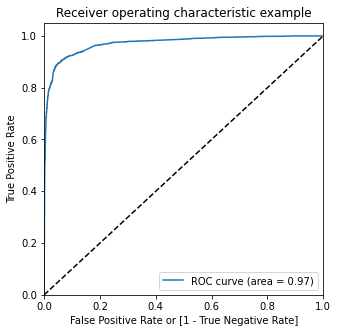

In [296]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### Inference :The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [297]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.171449,9196,0,1,1,0,0,0,0,0,0,0,0
1,0,0.031493,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.394112,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.006867,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.992912,1667,1,1,1,1,1,1,1,1,1,1,1


In [298]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.839477  0.974004  0.756826
0.2   0.2  0.898676  0.936688  0.875322
0.3   0.3  0.920217  0.917400  0.921947
0.4   0.4  0.926121  0.901048  0.941525
0.5   0.5  0.930429  0.884696  0.958527
0.6   0.6  0.927078  0.862055  0.967027
0.7   0.7  0.912877  0.806289  0.978362
0.8   0.8  0.902984  0.766457  0.986862
0.9   0.9  0.883198  0.706499  0.991757


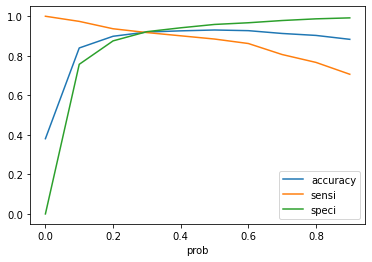

In [299]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [300]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.171449,9196,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.031493,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.394112,3274,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.006867,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.992912,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [301]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.171449,9196,0,17
1,0,0.031493,4696,0,3
2,0,0.394112,3274,1,39
3,0,0.006867,2164,0,1
4,1,0.992912,1667,1,99


In [302]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9202170097335248

In [303]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3579,  303],
       [ 197, 2188]])

In [304]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [305]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9174004192872117

In [306]:
# Let us calculate specificity
TN / float(TN+FP)



0.9219474497681608

In [307]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.07805255023183925

In [308]:
# Positive predictive value 
TP / float(TP+FP)

0.8783621035728623

In [309]:
# Negative predictive value
TN / float(TN+ FN)

0.9478283898305084

### Observation:

#So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

#Accuracy : 92.02%
#Sensitivity : 91.70%
#Specificity : 92.19%


### Precision and Recall

In [310]:
#Looking at the confusion matrix again

In [311]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3579,  303],
       [ 197, 2188]])

In [312]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8783621035728623

In [313]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9174004192872117

In [314]:
#Using sklearn utilities for the same

In [315]:
from sklearn.metrics import precision_score, recall_score

In [316]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8783621035728623

In [317]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9174004192872117

### Precision and recall tradeoff¶

In [318]:
from sklearn.metrics import precision_recall_curve

In [320]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

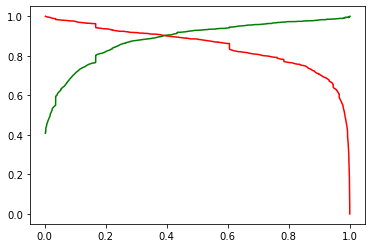

In [321]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [323]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

In [324]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [325]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.668862,-0.304384,0.135997,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2712,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [326]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.304384,1,0,0,1,0,0,0,0,0,0,0,1,0
984,-0.538073,1,0,0,1,0,1,0,0,0,0,1,0,0
8135,0.794688,1,0,0,1,0,0,0,0,0,0,0,0,0
6915,-0.614753,1,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.412100,0,0,0,0,0,0,0,0,0,0,0,0,1


In [327]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [328]:
y_test_pred = res.predict(X_test_sm)

In [329]:
y_test_pred[:10]

7681    0.024422
984     0.011651
8135    0.727077
6915    0.002404
2712    0.964531
244     0.002949
4698    0.006509
8287    0.035625
6791    0.987157
8970    0.006052
dtype: float64

In [330]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [331]:
# Let's see the head
y_pred_1.head()

,0
7681,0.024422
984,0.011651
8135,0.727077
6915,0.002404
2712,0.964531


In [332]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [333]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [334]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [335]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [336]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024422
1,0,984,0.011651
2,0,8135,0.727077
3,0,6915,0.002404
4,1,2712,0.964531


In [337]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [338]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024422
1,0,984,0.011651
2,0,8135,0.727077
3,0,6915,0.002404
4,1,2712,0.964531


In [339]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [340]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024422,2
1,984,0,0.011651,1
2,8135,0,0.727077,73
3,6915,0,0.002404,0
4,2712,1,0.964531,96


In [341]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [342]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024422,2,0
1,984,0,0.011651,1,0
2,8135,0,0.727077,73,1
3,6915,0,0.002404,0,0
4,2712,1,0.964531,96,1


In [343]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9221891288160834

In [344]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1550,  126],
       [  83,  927]])

In [345]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [346]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)



0.9178217821782179

In [347]:
# Let us calculate specificity
TN / float(TN+FP)

0.9248210023866349

In [348]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8803418803418803

In [349]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9178217821782179

### Observation:

#After running the model on the Test Data these are the figures we obtain:

#Accuracy : 92.21%
#Sensitivity : 91.78%
#Specificity : 92.48%

## Final Observation:
##Let us compare the values obtained for Train & Test:

## Train Data: 

#Accuracy : 92.02%
#Sensitivity : 91.70%
#Specificity : 92.19%
    
## Test Data: 

#Accuracy : 92.21%
#Sensitivity : 91.78%
#Specificity : 92.48%

### Thus the Model seems to predict the target Lead Conversion Rate very well and which is well above the ballpark figure of 80% as set by CEO of X Education.